In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import time
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy import cosmology
from astropy.modeling import fitting

import SAGA  
from SAGA import ObjectCuts as C

from SAGAbg.utils import calc_kcor
from SAGAbg import SAGA_get_spectra, line_fitting
import namer

import sys
sys.path.append('../scripts/')
import find_oiii4363

In [3]:
cosmo = cosmology.FlatLambdaCDM (70., 0.3)
dropbox_directory = '/Users/kadofong/Dropbox/SAGA/'
line_wavelengths = line_fitting.line_wavelengths
windowwidth = 100.
linewidth = 14.

In [4]:
clean = find_oiii4363.build_saga_catalog ().to_pandas ()

SAGA `shared_dir` set to /Users/kadofong/DropBox/SAGA/
SAGA `local_dir`  set to ../local_data/


/Users/kadofong/opt/miniconda3/envs/vanilla/lib/python3.10/site-packages/astropy/cosmology/flrw/lambdacdm.py:347: RuntimeWarning: divide by zero encountered in true_divide
  self._T_hypergeometric(s / (z2 + 1.0)))
/Users/kadofong/opt/miniconda3/envs/vanilla/lib/python3.10/site-packages/astropy/cosmology/flrw/lambdacdm.py:369: RuntimeWarning: invalid value encountered in multiply
  return 2 * np.sqrt(x) * hyp2f1(1./6, 1./2, 7./6, -x**3)


In [5]:
first_objects = clean[(clean['selection']==3)&(clean['ZQUALITY']>=3)&((clean['TELNAME']=='AAT')|(clean['TELNAME']=='MMT'))]
all_the_good_spectra = clean[(clean['ZQUALITY']>=3)&((clean['TELNAME']=='AAT')|(clean['TELNAME']=='MMT'))]
low_mass = all_the_good_spectra[all_the_good_spectra['cm_logmstar']<9.]

In [203]:
import glob 
computed = np.array(glob.glob('../local_data/line_fits/*/*lineparamsNOABSORPTION.dat'))
names = np.array([ x.split('/')[-2] for x in computed ] )
print(f"{len(names)} processed.")
has_sagaHA = clean['EW_Halpha']>0.

1613 processed.


In [204]:
hits = np.in1d ( names, clean[has_sagaHA].index )

In [207]:
haew_arr = np.zeros([len(computed), 2])
for model_index, model_file in enumerate(computed):
    model = np.genfromtxt(model_file)
    fluxes = np.genfromtxt(model_file.replace('lineparamsNOABSORPTION', 'fluxes'))
    haew_arr[model_index,0] = fluxes[0,3] / model[3]
    #haew_arr[model_index,1] = line_fitting.ew_uncertainty ( fluxes[0,3], model[3], 
                                                            


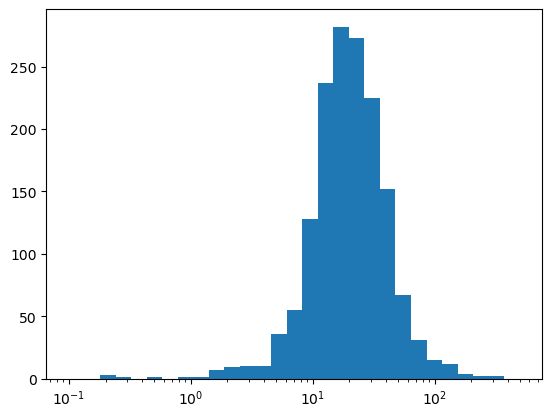

In [210]:
plt.hist(haew_arr[:,0], bins=np.logspace(-1, np.log10(500.), 30))
plt.xscale('log')

(-1.0, 500.0)

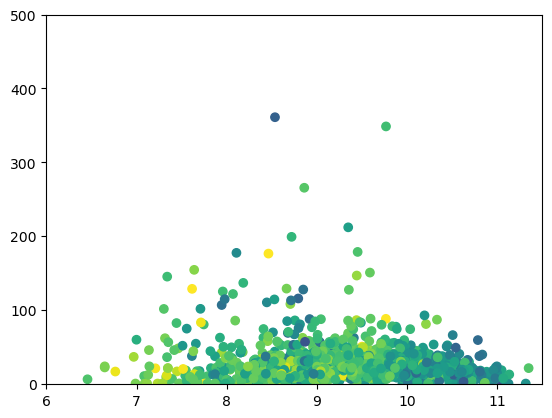

In [206]:
plt.scatter ( clean.loc[names]['cm_logmstar'], haew_arr[:,0], c=clean.loc[names]['sb_r'], vmin=18.,vmax=25. )
plt.xlim(6.,11.5)
#plt.yscale('log')
plt.ylim(-1.,500.)

Text(0, 0.5, '(this - catalog)/catalog')

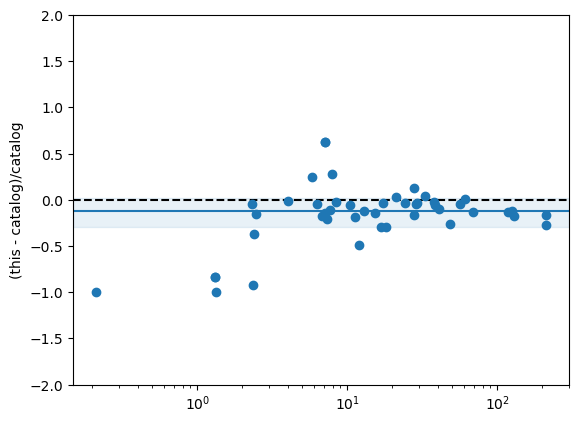

In [211]:
haew_gt = clean.loc[names[hits]]['EW_Halpha']
plt.errorbar ( haew_gt, (haew_arr[hits,0] - haew_gt)/haew_gt, fmt='o', yerr=3.*haew_arr[hits,1]/haew_gt )
plt.axhline(np.median((haew_arr[hits,0] - haew_gt)/haew_gt), color='C0')
plt.axhspan(*np.quantile((haew_arr[hits,0] - haew_gt)/haew_gt, [0.16,.84]), color='C0', alpha=0.1)
plt.axhline(0., color='k', ls='--')
plt.ylim(-2,2)
plt.xscale('log')
plt.ylabel('(this - catalog)/catalog')

In [213]:
from astropy import constants as co
from astropy import units as u
#
clean['cz'] = co.c.to(u.km/u.s).value * clean['SPEC_Z']
clean['radius_phys'] = cosmo.kpc_proper_per_arcmin(clean['SPEC_Z'].values).to(u.kpc/u.arcsec).value * clean['radius']
clean['ha_ew'] = np.NaN
clean.loc[names,'ha_ew'] = haew_arr[:,0]

/Users/kadofong/opt/miniconda3/envs/vanilla/lib/python3.10/site-packages/astropy/cosmology/flrw/lambdacdm.py:347: RuntimeWarning: divide by zero encountered in true_divide
  self._T_hypergeometric(s / (z2 + 1.0)))
/Users/kadofong/opt/miniconda3/envs/vanilla/lib/python3.10/site-packages/astropy/cosmology/flrw/lambdacdm.py:369: RuntimeWarning: invalid value encountered in multiply
  return 2 * np.sqrt(x) * hyp2f1(1./6, 1./2, 7./6, -x**3)


In [224]:
clean.query('EW_Halpha>0.')['cm_logmstar ha_ew'.split()].dropna()

,cm_logmstar,ha_ew
wordid,,
career_commemorates,7.613968,37.282170
gaudiness_eerily,8.554070,6.090203
gush_neural,9.409940,61.926195
deduces_precondition,7.471922,0.198538
veil_logicians,7.129465,11.815487
mainspring_exogenous,8.035405,2.209578
recency_waders,7.870313,37.017703
caracals_recalling,7.338308,35.774538
linearly_promenade,8.145161,2.092697


In [252]:
objname = 'flit_misbehaving'

/Users/kadofong/opt/miniconda3/envs/vanilla/lib/python3.10/site-packages/astropy/modeling/functional_models.py:180: RuntimeWarning: divide by zero encountered in true_divide
  return amplitude * np.exp(- 0.5 * (x - mean) ** 2 / stddev ** 2)


[u_flux] 9 sec elapsed; 0.09 avg. laptime


[1]

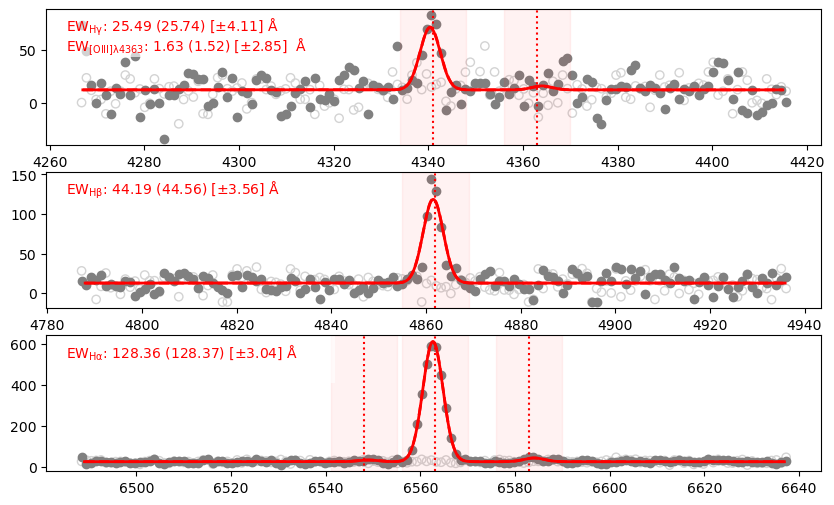

In [260]:
import linesearch
line_fluxes, u_fc, model_fit, model_fit_noabs = linesearch.singleton ( clean.loc[objname], 
                                                                      '/Users/kadofong/Dropbox/SAGA', savefig=True )
plt.get_fignums()

In [268]:
low_mass = all_the_good_spectra[(all_the_good_spectra['cm_logmstar']<9.)&(all_the_good_spectra['SPEC_Z']<0.2)]

In [269]:
len(low_mass) * 10. / 3600.

12.722222222222221

In [249]:
obj = clean.loc[objname]
windowwidth = 150.

In [250]:
flux, wave, _, _ = SAGA_get_spectra.saga_get_spectrum(obj, dropbox_directory)
finite_mask = np.isfinite(flux)
flux = flux[finite_mask]
wave = wave[finite_mask]
restwave = wave / (1. + obj['SPEC_Z'] )

(-5.0, 298.23829742431616)

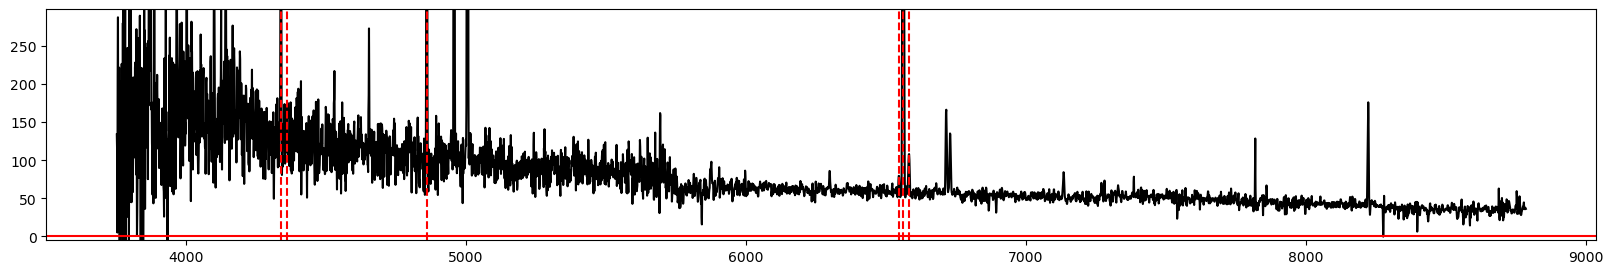

In [251]:
plt.figure(figsize=(20,3))
plt.plot ( restwave, flux,color='k' )
plt.axhline(0., color='r')

for line in line_wavelengths:
    plt.axvline(line_wavelengths[line], color='r', ls='--')
plt.ylim(-5,np.nanquantile(flux,.99))

In [288]:
model_fit_noabs.param_names[33]

'amplitude_11'

In [229]:
outside_windows, outside_lines = line_fitting.define_lineblocs ( restwave )
halpha_bloc = line_fitting.get_linewindow ( restwave, line_wavelengths['Halpha'], windowwidth )

In [230]:
continuum = flux[halpha_bloc&outside_lines]

In [231]:
line_index = 3
continuum_index = 2

lflux = line_fluxes[0,line_index]
u_lflux = line_fluxes[2,line_index]
fcont =  model_fit_noabs.amplitude_1
u_fcont = u_fc[continuum_index]
ew = lflux / fcont

In [232]:
u_ew = (u_lflux / fcont)**2
u_ew += (lflux / fcont**2 * u_fcont)**2
u_ew = np.sqrt(u_ew)

In [258]:
np.sqrt(878**2 + 573**2) / 116 * 10.**1.64

394.5326401892281

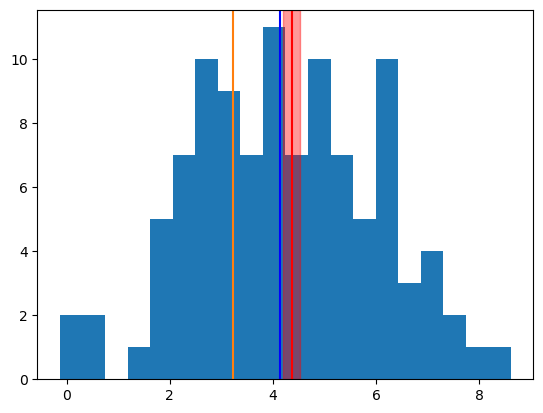

In [235]:
plt.hist(continuum, bins=20)
plt.axvline ( lflux / clean.loc[objname,'EW_Halpha'], color='C1')
plt.axvline(fcont.value, color='r')
plt.axvline(np.median(continuum), color='b')
plt.axvspan ( fcont.value - u_fcont, fcont.value + u_fcont, color='r', alpha=0.4)